<h1>Домашнее задание №3</h1>

<h2>Выполнил: Болгарин Максим, BD-11</h2>

<p><b>Постановка задачи:</b> выполнить анализ датасета, с признаками, агрегированными по времени. Провести визуальный анализ, проверить статистические гипотезы и построить предсказание временного ряда. Сделать выводы.<p>

<b>План выполнения:</b>
<ol>
    <li>Выбор датасета
        <ul>
            <li>Мой выбор остановился на датасете с kaggle.com, который называется Crimes in Boston.</li>
            <li>В качестве признака, агрегированого по времени, можно взять число преступлений в отдельно взятый день.</li>
        </ul>
    </li>
    <li>Первичный анализ данных
        <ul>
            <li>Изучение данных: смысл признаков, какие типы имеют переменные, есть ли пропуски и т.д.</li>
        </ul>
    </li>
    <li>Предобработка данных
        <ul>
            <li>Очистка и отбор данных, выполнение необходимых преобразований.</li>
        </ul>
    </li>
    <li>Визуальный анализ данных
        <ul>
            <li>Поиск скрытых особенностей в данных, анализ корреляций.</li>
        </ul>
    </li> 
    <li>Проверка статистических гипотез
        <ul>
            <li>Параметрический критерий.</li>
            <li>Непараметрический критерий.</li>
        </ul>
    </li>
    <li>Построение предсказания временного ряда
    </li>
    <li>Выводы

    </li>
</ol>

<hr>

<h3>1. Выбор датасета, подключение необходимых библиотек</h3>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import folium
from folium import plugins

In [2]:
crimes_in_boston = pd.read_csv("data/crime.csv", engine='python')

In [3]:
crimes_in_boston.sample(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
238662,I162029528,3125,Warrant Arrests,WARRANT ARREST,A1,119,NaN,2016-04-16 13:43:00,2016,4,Saturday,13,Part Three,PARK ST,42.356502,-71.062000,"(42.35650174, -71.06199960)"
177010,I162095695,3125,Warrant Arrests,WARRANT ARREST,B3,465,NaN,2016-11-22 14:30:00,2016,11,Tuesday,14,Part Three,BLUE HILL AVE,42.284826,-71.091374,"(42.28482577, -71.09137369)"
15608,I182053955,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D4,171,Y,2018-07-09 15:00:00,2018,7,Monday,15,Part One,HARRISON AVE,NaN,NaN,"(0.00000000, 0.00000000)"
280153,I152092201,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,B3,455,NaN,2015-11-06 13:49:00,2015,11,Friday,13,Part Three,NORWELL ST,42.301950,-71.077981,"(42.30195045, -71.07798088)"
96076,I172075876,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,397,NaN,2017-09-12 19:59:00,2017,9,Tuesday,19,Part Two,BRENT ST,42.290030,-71.066875,"(42.29002965, -71.06687496)"


In [4]:
crimes_in_boston.shape

(319073, 17)

<p>Видим, что данные успешно загрузились и выглядят вполне адекватно. Можем работать дальше.</p>

<br>

<h3>2. Первичный анализ данных</h3>

<p>Посмотрим общую информацию по датасету:</p>

In [5]:
crimes_in_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [6]:
crimes_in_boston.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

<p>Теперь посмотрим на некоторые столбцы, вызывающие вопросы:</p>

<p>OFFENSE_*</p>

In [7]:
crimes_in_boston.OFFENSE_CODE_GROUP.value_counts()[:6] / crimes_in_boston.OFFENSE_CODE_GROUP.size

Motor Vehicle Accident Response    0.116375
Larceny                            0.081282
Medical Assistance                 0.073776
Investigate Person                 0.058764
Other                              0.056648
Drug Violation                     0.051863
Name: OFFENSE_CODE_GROUP, dtype: float64

In [8]:
crimes_in_boston.OFFENSE_DESCRIPTION.value_counts()[:6] / crimes_in_boston.OFFENSE_DESCRIPTION.size

SICK/INJURED/MEDICAL - PERSON            0.058867
INVESTIGATE PERSON                       0.058777
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051158
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046356
VERBAL DISPUTE                           0.041053
Name: OFFENSE_DESCRIPTION, dtype: float64

<p>DISTRICT</p>

In [9]:
crimes_in_boston.DISTRICT.value_counts()[:5] / crimes_in_boston.DISTRICT.size

B2     0.156532
C11    0.133292
D4     0.131365
A1     0.111940
B3     0.111078
Name: DISTRICT, dtype: float64

<p>REPORTING_AREA</p>

In [10]:
crimes_in_boston.REPORTING_AREA.value_counts()[:5] / crimes_in_boston.REPORTING_AREA.size

       0.063465
111    0.007434
186    0.006318
329    0.005886
117    0.005742
Name: REPORTING_AREA, dtype: float64

<p>SHOOTING</p>

In [11]:
crimes_in_boston.SHOOTING.value_counts()

Y    1019
Name: SHOOTING, dtype: int64

<p>UCR_PART</p>

In [12]:
crimes_in_boston.UCR_PART.value_counts() / crimes_in_boston.UCR_PART.size

Part Three    0.496918
Part Two      0.305789
Part One      0.193150
Other         0.003861
Name: UCR_PART, dtype: float64

<p>STREET</p>

In [13]:
crimes_in_boston.STREET.value_counts()[:5] / crimes_in_boston.STREET.size

WASHINGTON ST     0.044485
BLUE HILL AVE     0.024427
BOYLSTON ST       0.022631
DORCHESTER AVE    0.016137
TREMONT ST        0.015031
Name: STREET, dtype: float64

<p>Пройдемся по каждому столбцу и попробуем понять их смысл по той информации, которая у нас уже есть:</p>
<ol>
    <li>INCIDENT_NUMBER: какой то номер проишествия, уникальных номеров почти столько же, сколько всего объектов,
        поэтому делаем вывод, что это просто некий id и нам он не интересен.</li>
    <li>OFFENSE_CODE: классифицирует преступления по типу содеянного. Вместе с датасетом шел файл, который 
        расшифровывает эти коды. Сравнив данные из этого файла со следующими двумя столбцами, приходим к выводу, что 
        они взаимозаменяемые. Поэтому выкинем этот столбец.</li>
    <li>OFFENSE_CODE_GROUP: коды из прошлого столбца разбиты на некоторые группы, собственно вот они.</li>
    <li>OFFENSE_DESCRIPTION: суть такая же, как и у ппрошлого, однако здесь приводится некоторое описание преступления - 
        информации больше. Оставим оба столбца.</li>
    <li>DISTRICT: метка района (квартала), в котором произошло преступление. Причем это не обычное разбиение на районы, 
        а разбиение, сделанное Департаментом полиции Бостона. Оно отличается от классического, которым пользуются жители 
        города. Оставим.</li>
    <li>REPORTING_AREA: из названия можно подумать, что это как то относится к местоположению, но что это конкретно - непонятно.
        Судя по значениям, это кодовые названия, но таблицы с расшифровкой у меня нет. Плюс ко всему, в датасете есть
        другие столбцы, описывающие место преступления (район, улица, координаты), поэтому данный можно отбросить.</li>
    <li>SHOOTING: стрельба во время преступления. Если значения нет, значит стрельбы не было. Пропуски следует 
        заполнить нулями, а остальное - единицами.</li>
    <li>OCCURRED_ON_DATE: дата и время преступления. Так как есть подобный столбец, можно выкинуть YEAR, MONTH и 
        HOUR. DAY_OF_WEEK оставим, так как в OCCURRED_ON_DATE нет информации о дне недели.</li>
    <li>UCR_PART: судя по википедии, в этом столбце указана информация о принадлежности преступления к некому классу 
        в Едином Отчете о Преустпности. Имеет 4 различных значения, и это очередное деление преступлений на классы. 
        У нас есть столбцы с более подробным описанием, так что этот можно отбросить.</li>
    <li>STREET: Название улицы. Улицы бывают разные, и, как мне кажется, будет проще провести кластеризацию по 
        координатам, чем пытаться анализировать преступления по названию улиц. Тем более их 4657. Отбрасываем.</li>
    <li>Location: этот столбец можно выкинуть, но оставить Lat и Long и привести их к типу float32. 7 знаков 
        после запятой для координаты нам будет достаточно.</li>
</ol>   

<p>Примечание: в работе я часто применяю слово "преступление" для описания объектов датасета. Это не совсем правильно, так как в датасете скорее содержится информация об обращениях в полицию, и это не только сообщения о преступлениях. Однако, понял я это не сразу, много уже написал, поэтому пусть это будут "преступления", но с этой оговоркой.</p>

<br>

<h3>3. Предобработка данных</h3>

<p>Выкинем те столбцы, которые нам точно не нужны, приведем типы и заполним столбец SHOOTING:</p>

In [14]:
crimes_in_boston = crimes_in_boston.drop(
    ['INCIDENT_NUMBER', 'OFFENSE_CODE', 
     'REPORTING_AREA', 'YEAR', 
     'MONTH', 'HOUR', 'UCR_PART', 
     'STREET', 'Location'], 
    axis='columns'
)

In [15]:
crimes_in_boston.Lat = crimes_in_boston.Lat.astype('float32')
crimes_in_boston.Long = crimes_in_boston.Long.astype('float32')

In [16]:
crimes_in_boston.SHOOTING = crimes_in_boston.SHOOTING.fillna(0)
crimes_in_boston.SHOOTING = crimes_in_boston.SHOOTING.replace('Y', 1)
crimes_in_boston.SHOOTING = crimes_in_boston.SHOOTING.astype('int32')

<p>Для удобства преобразуем стобец OCCURRED_ON_DATE в два других: DATE и TIME. В первом будет храниться дата, 
    во втором - время.</p>

In [17]:
crimes_in_boston['DATE'] = pd.to_datetime(crimes_in_boston.OCCURRED_ON_DATE).dt.date
crimes_in_boston['TIME'] = pd.to_datetime(crimes_in_boston.OCCURRED_ON_DATE).dt.time.map(lambda x: x.replace(second=0))

In [18]:
crimes_in_boston = crimes_in_boston.drop(
    ['OCCURRED_ON_DATE'], 
    axis='columns'
)

<p>Удалим значения широты и долготы, если они равны -1 (то есть неизвестны):</p>

In [19]:
crimes_in_boston['Lat'] = crimes_in_boston['Lat'].replace(-1.0, np.NAN)
crimes_in_boston['Long'] = crimes_in_boston['Long'].replace(-1.0, np.NAN)

<p>Выведем информацию об обновленном датафрейме:</p>

In [20]:
crimes_in_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 9 columns):
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
SHOOTING               319073 non-null int32
DAY_OF_WEEK            319073 non-null object
Lat                    298329 non-null float32
Long                   298329 non-null float32
DATE                   319073 non-null object
TIME                   319073 non-null object
dtypes: float32(2), int32(1), object(6)
memory usage: 18.3+ MB


<p>Теперь посчитаем долю числа объектов с пропусками:</p>

In [21]:
(crimes_in_boston.shape[0] - crimes_in_boston.dropna().shape[0])/crimes_in_boston.shape[0]

0.06782460440087378

<p>Пропуски имеют всего лишь 7% от всех объектов. Можно пойти легким путем и просто выкинуть их 
из датасета. Однако, мы собрались выбрать число преступлений в отдельно взятый день в качестве 
признака, агрегированного по времени. А как мы видим, столбец с датой не имеет пропусков. Поэтому, 
выкидывая эти 7%, мы заведомо делаем наш результат хуже. В дальнейшем, при анализе каких либо других 
признаков (имеющих пропуски), можно воспользоваться этой возможностью.</p>

<p>Теперь сделаем две таблицы: одну с данными о числе преступлений за каждый день, а другую - с данными о числе преступлений за каждый час, при этом усреднив эти значения по всем рассматриваемым дням.</p>

In [22]:
crimes_per_date = crimes_in_boston.DATE.value_counts().sort_index().to_frame()
crimes_per_date.index = pd.to_datetime(crimes_per_date.index)
crimes_per_date = crimes_per_date.rename({'DATE': 'crime_count'}, axis=1)
crimes_per_date.head()

,crime_count
2015-06-15,249
2015-06-16,249
2015-06-17,234
2015-06-18,294
2015-06-19,289


In [23]:
crimes_per_time = crimes_in_boston.TIME.value_counts().sort_index().to_frame()
crimes_per_time = crimes_per_time.rename({'TIME': 'crime_count'}, axis=1)
crimes_per_time.head()

,crime_count
00:00:00,5566
00:01:00,583
00:02:00,149
00:03:00,132
00:04:00,145


<p>Мы агрегировали преступления по времени, теперь можно выкинуть объекты с пропусками из основного датафрейма, чтобы 
они не мешали при дальнейшем анализе.</p>

In [24]:
crimes_in_boston = crimes_in_boston.dropna()

<p>Все необходимые приготовления сделаны. Приступим к визуальному анализу данных.</p>

<br>

<h3>4. Визуальный анализ данных</h3>

<p>Для начала построим карту всех преступлений. Исходя из неё уже можно будет сделать какие то выводы.</p>

<p>К сожалению, folium не отображает все преступления на одной карте, поэтому я беру случайный семпл.</p>

In [25]:
def create_crimes_map(latitude, longitude, random_sample=True, sample_size=25000):
    if len(latitude) == 0 or len(longitude) == 0:
        return None
    
    places = [(lat, long) for lat, long in zip(latitude, longitude)]
    if random_sample:
        if sample_size > len(places):
            sample_size = len(places)
            
        places = [places[i] for i in sorted(random.sample(range(len(places)), sample_size))]
    
    crimes_map = folium.Map(places[9], tiles='OpenStreetMap', zoom_start=11.4)
    plugins.HeatMap(places, radius=11, overlay=False, max_val=4).add_to(crimes_map)
    
    return crimes_map

In [26]:
create_crimes_map(crimes_in_boston.Lat, crimes_in_boston.Long)

<p>Первым, что бросается в глаза - то, что преступления распределены не совсем равномерно: наблюдаются небольшие сгущения, разбросанные по всему городу, и самое заметное из них - в центре.</p>
   
<p>Также заметна интересная особенность: в районе лесопарковых зон преступлений нет. Однако, это скорее связано с тем, что при проишествии в парке указываются не точные координаты преступления, а координаты ближайшего входа в парк.</p>
  
<p>Смотря на карту может появиться предположение о том, что повышенный уровень преступлений в самом центре связан с большим количеством ДТП в этом районе (из за большого числа автомобилей в центре). Проверим это предположение, построив карту только с ДТП.</p>

In [27]:
create_crimes_map(
    crimes_in_boston[crimes_in_boston.OFFENSE_CODE_GROUP == 'Motor Vehicle Accident Response'].Lat, 
    crimes_in_boston[crimes_in_boston.OFFENSE_CODE_GROUP == 'Motor Vehicle Accident Response'].Long)

<p>Как оказалось, предположение оказалось верным лишь на половину: действительно, чем ближе к центру, тем больше происходит ДТП, и это очевидно. Однако, подобные события не вносят решающего вклада в то самое заметное сгущение на карте. Посмотрев поближе, можно заметить, что значительная часть проишествий происходят на перекрестках и крупных дорогах, что вполне предсказуемо. Поэтому можно исключить из датасета преступления, связанные с ДТП, так как они больше не несут никакого интереса для анализа.</p>

<p>Также существует такая группа преступлений, как Medical Assistance. На самом деле, как я понял, это не преступление - это просто вызов скорой помощи (или что то подобное). Поэтому такие "преступления" можно так же отбросить.</p>

In [28]:
crimes_in_boston = crimes_in_boston[crimes_in_boston.OFFENSE_CODE_GROUP != 'Motor Vehicle Accident Response']
crimes_in_boston = crimes_in_boston[crimes_in_boston.OFFENSE_CODE_GROUP != 'Medical Assistance']

<p>Конечно, можно строить подобные карты для каждого отдельного типа престулпения и попытаться провести анализ таким способом, но, на мой взгляд, это нерационально. Поэтому пока оставим карты и, зная, что преступления распределены не совсем равномерно, попробуем проанализировать различные районы на предмет повышенного уровня преступности какого то определенного типа. Если подобный анализ не даст удовлетворительных результатов, будем думать дальше.</p>

In [29]:
def print_crimes_in_district(crimes, districts, crimes_to_show=3, 
                             threshold=0.1, description=False, group=None):
    for name in districts:
        crimes_in_district = crimes[crimes.DISTRICT == name]
        
        if not description:
            number_of_crimes = crimes_in_district.OFFENSE_CODE_GROUP.size
            crimes_counts = crimes_in_district.OFFENSE_CODE_GROUP.value_counts()
        else:
            if group is None:
                number_of_crimes = crimes_in_district.OFFENSE_DESCRIPTION.size
                crimes_counts = crimes_in_district.OFFENSE_DESCRIPTION.value_counts()
            else:
                number_of_crimes = crimes_in_district[
                    crimes_in_district.OFFENSE_CODE_GROUP == group
                    ].OFFENSE_DESCRIPTION.size
                
                crimes_counts = crimes_in_district[
                    crimes_in_district.OFFENSE_CODE_GROUP == group
                    ].OFFENSE_DESCRIPTION.value_counts()
        
        if crimes_counts[0]/number_of_crimes > threshold:
            print(10*'-')
            print(name) 
            print('Number of crimes: ', number_of_crimes)
            print(crimes_counts[:crimes_to_show]/number_of_crimes)
            print('Percentage from all of crimes: %.3f' %
                 np.sum([crimes_counts[i]/number_of_crimes for i in range(crimes_to_show)]))

In [30]:
def plot_crimes_in_district(crimes, districts, crimes_to_show=3, 
                            threshold=0.1, description=False, group=None):
    
    number_of_districts = len(districts)
    
    if description:
        bar = pd.DataFrame([], index=districts, columns=crimes.OFFENSE_DESCRIPTION.unique())
    else:
        bar = pd.DataFrame([], index=districts, columns=crimes.OFFENSE_CODE_GROUP.unique())
        
    indices = np.arange(number_of_districts) 
    
    for i, name in enumerate(districts):
        if description:
            if group:
                crimes_in_district = crimes[crimes.DISTRICT == name]
                crimes_in_district = crimes_in_district[
                    crimes_in_district.OFFENSE_CODE_GROUP == group].OFFENSE_DESCRIPTION
            else:
                crimes_in_district = crimes[crimes.DISTRICT == name].OFFENSE_DESCRIPTION
        else:
            crimes_in_district = crimes[crimes.DISTRICT == name].OFFENSE_CODE_GROUP
        
        for crime in range(crimes_to_show):
            crime_name = crimes_in_district.value_counts().index[crime]
            number_of_crimes = crimes_in_district.size
            percent = crimes_in_district.value_counts()[crime] / number_of_crimes
            
            if percent > threshold:
                bar[crime_name][i] = percent
    
    bar = bar.dropna(axis=0, how='all')
    bar = bar.dropna(axis=1, how='all')
    ax = bar.plot.bar(figsize=(12, 7))
    ax.grid()

In [31]:
crimes_in_boston.OFFENSE_CODE_GROUP.value_counts()[:6] / crimes_in_boston.OFFENSE_CODE_GROUP.size

Larceny               0.102627
Investigate Person    0.073619
Other                 0.069809
Simple Assault        0.060938
Vandalism             0.060778
Drug Violation        0.059313
Name: OFFENSE_CODE_GROUP, dtype: float64

In [32]:
crimes_in_boston.DISTRICT.value_counts()

B2     37937
D4     33385
C11    32868
B3     28207
A1     28042
C6     17586
D14    15111
E13    13383
E18    12932
A7     10390
E5      9647
A15     4893
Name: DISTRICT, dtype: int64

<p>Отобразим информацию только о тех районах, в которых доля проишествий какого то отдельного типа превышает 10% от всех проишествий в этом районе:</p>

In [33]:
print_crimes_in_district(crimes_in_boston, crimes_in_boston.DISTRICT.unique())

----------
D14
Number of crimes:  15111
Larceny               0.105883
Towed                 0.095692
Investigate Person    0.077890
Name: OFFENSE_CODE_GROUP, dtype: float64
Percentage from all of crimes: 0.279
----------
D4
Number of crimes:  33385
Larceny               0.214108
Simple Assault        0.060207
Investigate Person    0.059098
Name: OFFENSE_CODE_GROUP, dtype: float64
Percentage from all of crimes: 0.333
----------
B3
Number of crimes:  28207
Verbal Disputes       0.104265
Investigate Person    0.085511
Other                 0.072890
Name: OFFENSE_CODE_GROUP, dtype: float64
Percentage from all of crimes: 0.263
----------
A1
Number of crimes:  28042
Larceny           0.160046
Simple Assault    0.074246
Other             0.066935
Name: OFFENSE_CODE_GROUP, dtype: float64
Percentage from all of crimes: 0.301
----------
E5
Number of crimes:  9647
Investigate Person    0.108427
Other                 0.080958
Drug Violation        0.067689
Name: OFFENSE_CODE_GROUP, dtype: float64

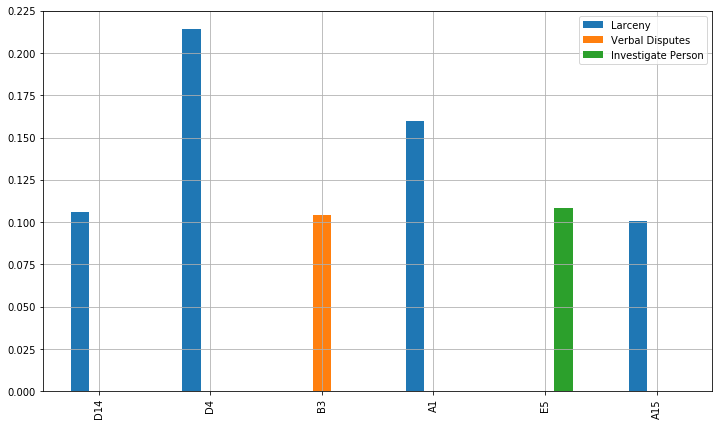

In [34]:
plot_crimes_in_district(crimes_in_boston, crimes_in_boston.DISTRICT.unique())

<p>Заметим, что почти во всех районах нет какого то ярко выдленного типа преступления (на графике видим только половину районов). Однако есть район, который сильно выделяется повышенным уровнем Larceny (21.5% от всех преступлений, хотя по всему городу доля подобных преступлений - 10.3%) - это район D4. Также подобная проблема наблюдается в районе A1 (16.1%). Рассмотрим эти районы подробнее:</p>

<img src="image/boston-police-districts-map.jpg">

<p>Как можем заметить, районы A1 и D4 - это те самые районы, в которых наблюдалась самая высокая "плотность" нарушений (на карте, которую строили выше). И хоть эти два района и не первые по абсолютному числу преступлений (2 и 5 места), их по праву можно назвать самыми преступными, так как у них наибольшее отношение числа правонарушений к площади района (визуально, но полагаю, что если найти значения площадей и посчитать, результат будет тот же).</p>

<p>В качестве дальнейшего анализа можно использовать описания преступлений и понять, какие именно нарушения типа Larceny преобладают в этих двух районах:</p>

In [35]:
print_crimes_in_district(crimes_in_boston, ['A1', 'D4'], description=True, group='Larceny')

----------
A1
Number of crimes:  4488
LARCENY THEFT FROM BUILDING    0.384358
LARCENY SHOPLIFTING            0.300134
LARCENY ALL OTHERS             0.182487
Name: OFFENSE_DESCRIPTION, dtype: float64
Percentage from all of crimes: 0.867
----------
D4
Number of crimes:  7148
LARCENY SHOPLIFTING            0.447258
LARCENY THEFT FROM BUILDING    0.315753
LARCENY ALL OTHERS             0.121013
Name: OFFENSE_DESCRIPTION, dtype: float64
Percentage from all of crimes: 0.884


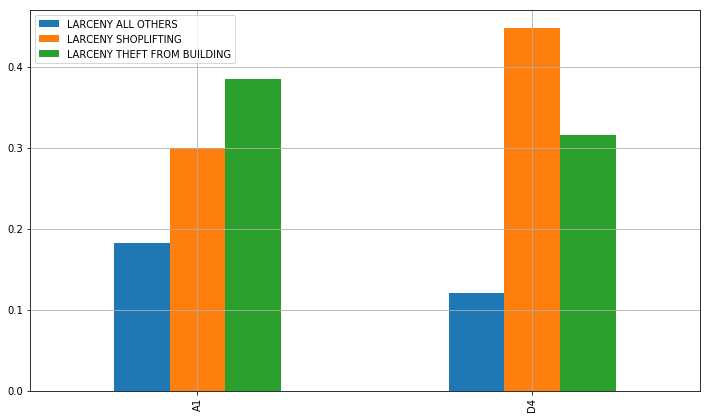

In [36]:
plot_crimes_in_district(crimes_in_boston, ['A1', 'D4'], description=True, group='Larceny')

<p>SHOPLIFTING - магазинная кража, THEFT FROM BUILDING - кража из здания (буквально; думаю имеется ввиду хищение частного имущества из квартир, офисов и тд). Интерпретировать эти данные можно по разному. Так как я не имею информации о количестве магазинов, количества жилых квартир т.д. в этих районах, я не могу сделать точный вывод. Но вот мое предположение: повышенный уровень подобных преступлений связан с тем, что в центре города высокая плотность расположения магазинов, многие из них, возможно, являются премиумными с дорогим товаром, что и привлекает преступников. Относительно жилых помещений можно сказать то же самое - в центре живут по большей части обеспеченые люди с дорогим имуществом.</p>

<p>Конечно, полученные результаты интересны, но можно получить еще больше. Для этого стоит провести плотностную кластеризацию по координате. В качестве алгоритма кластеризации можно использовать DBSCAN. С помощью этого метода мы получим разделение преступлений по кластерам в зависимости от их местоположения, что даст возможность более комплексно проанализировать преступность в городе.</p>

<p>Однако, несмотря на ту полезную информацию, которую можно получить с помощью кластеризации, в данной работе я её реализовывать не буду. Думаю, что интереснее сейчас будет перейти к следующей части работы: анализу временных рядов, а конкретнее, зависимости числа преступлений от даты и времени.</p>

<p>Для начала построим график зависимости числа преступлений от даты и попробуем произвести его анализ:</p>

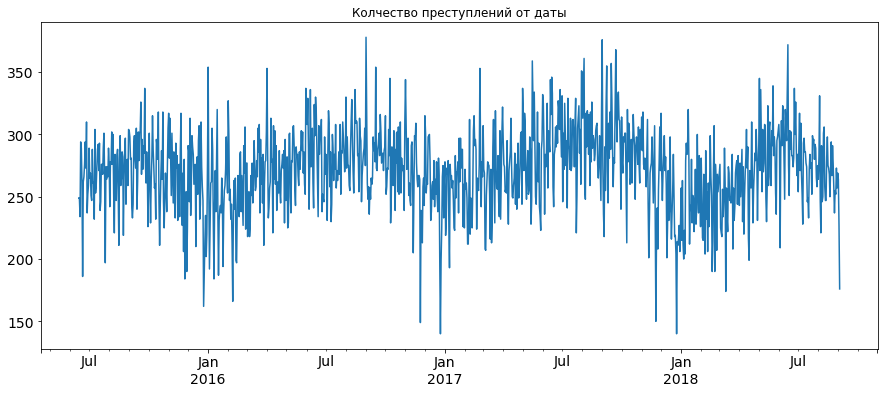

In [37]:
crimes_per_date.crime_count.plot(figsize=(15,6), title='Колчество преступлений от даты', fontsize=14)

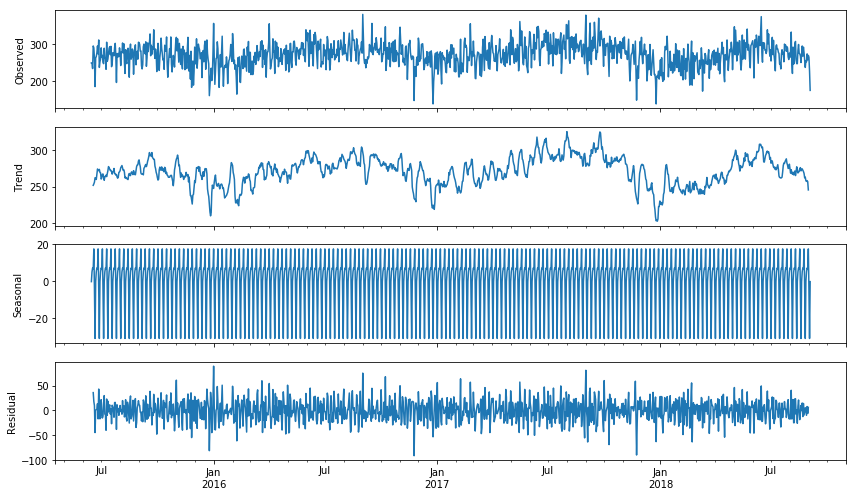

In [38]:
rcParams['figure.figsize'] = 12, 7
sm.tsa.seasonal_decompose(crimes_per_date.crime_count).plot()
plt.show()

<p>Как видим из STL-декомпозиции, ряд обладает ярко выраженной сезонностью. Также можно наблюдать цикличное поведение, выражающееся в уменьшении числа преступлений при приближении к январю и возрастание при движении к августу.</p>

<p>Теперь построим коррелограмму:</p>

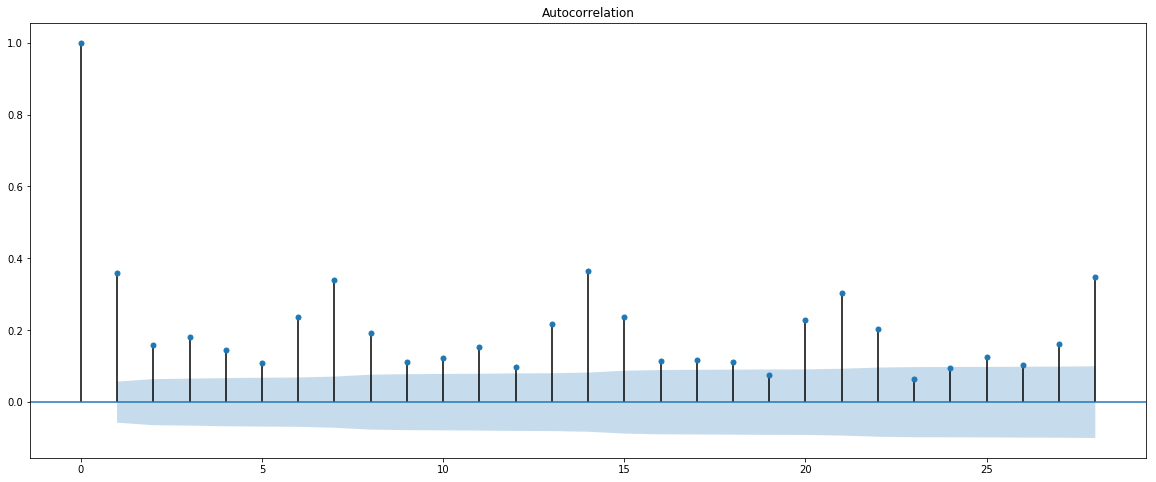

In [39]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(crimes_per_date.crime_count.values, lags=28, ax=ax)
plt.show()

<p>На коррелограмме отчетливо видна автокорреляция временного ряда с лагом t = 7.</p>

<p>Теперь проведем подобный анализ для другого временного ряда - зависимости количества преступлений от времени в течение дня, усредненное по всем дням в исследуемых данных</p>

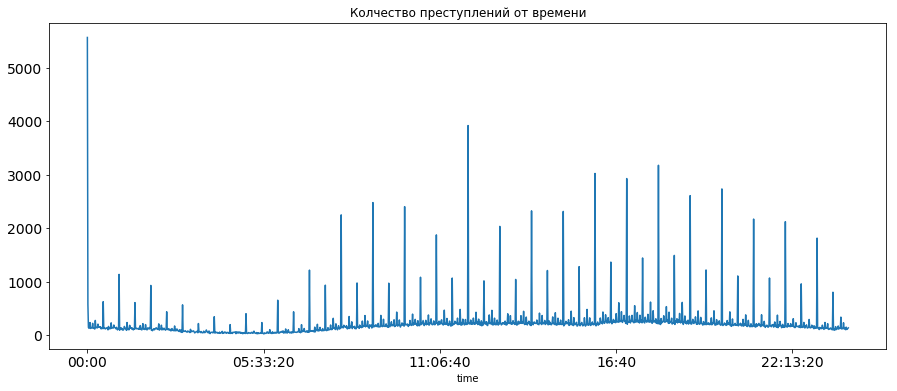

In [40]:
crimes_per_time.crime_count.plot(figsize=(15,6), title='Колчество преступлений от времени', fontsize=14)

In [41]:
crimes_per_time.sort_values(by='crime_count', ascending=False)[:5]

,crime_count
00:00:00,5566
12:00:00,3920
18:00:00,3178
16:00:00,3025
17:00:00,2930


<p>Как видим, в датасете время указывалось не точно. Сильно выделяются точки, соответсвующие 00:00 и 12:00. Скорее всего, когда время преступления оставалось неизвестным, ему присуждалось время 00:00, если оно ориентировочно произошло вечером-ночью, и 12:00, если днем-утром.</p>

<p>Несмотря на это, даже по такому графику можно сделать какие то примитивные выводы: ночью проишествий заметно меньше, чем днем, а их количество растет, достигая максимального значения ближе к 18:00. Также заметен второй локальный максимум в районе 09:00. Возможно это связано с тем, что большая часть преступлений (все таки слово "преступление" здесь не совсем корректно, правильнее говорить "обращение к полиции") происходит в то время, когда люди едут из дома на работу и с работы домой (например, ДТП).</p>

<p>По моему мнению, значения в этом ряду можно усреднить по часам. Однако, мы не можем отделить значения, о которых написано выше, то есть те преступления, время которых указано с большой погреншностью. Обилие подобных неточных значений внесут искажение в итоговые результаты. Поэтому я предлагаю в дальнейшем не рассматривать данный временной ряд.</p>

In [42]:
del crimes_per_time

<p><b>Промежуточные результаты:</b><p>
<ul>
    <li>Была построена карта плотности числа преступлений. Сделан вывод: преступления (обращения к полиции) неравномерны по координате и разбиваются на кластеры, ближе к центру плотность увеличивается.</li>
    <li>Произведен анализ районов с выявлением наиболее популярного типа проишествия. Вывод: почти во всех районах преступления распределены равномерно по типу, кроме двух центральных - A1 и D4, в которых преобладает Larceny.</li>
    <li>Из анализа зависимости числа преступлений от даты стало понятно, что этот временной ряд автокоррелирован с лагом ровно в одну неделю. Также наблюдается цикличный тренд с уменьшением числа преступлений при движении от августа к январю и увеличением при движении от января к августу.</li>
    <li>Как стало ясно из анализа графика зависимости числа преступлений от времени дня, информация в данном датасете недостаточно точная, чтобы проводить анализ подобного временного ряда.</li>
</ul>

<br>

<h3>5. Проверка статистических гипотез</h3>

<p>Для начала построим распределение числа преступлений:</p>

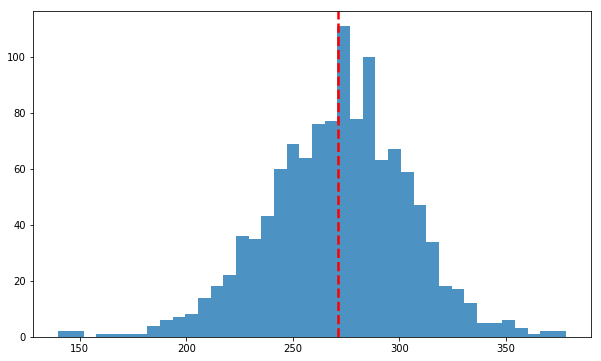

In [43]:
plt.figure(figsize=(10, 6))

plt.hist(crimes_per_date.crime_count, 40, alpha=0.8)
plt.axvline(np.mean(crimes_per_date.crime_count), color='r', linestyle='dashed', linewidth=2.5)
plt.show()

<p>Теперь проверим его на нормальность:</p>

<p>С помощью Q-Q графика:</p>

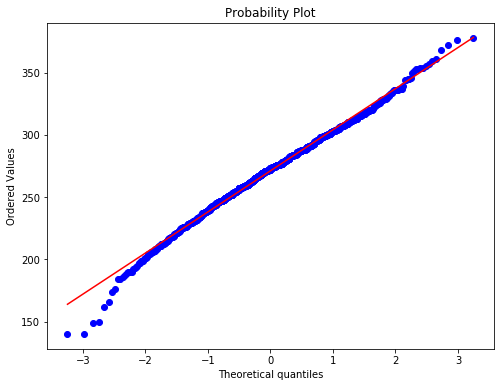

In [44]:
plt.figure(figsize=(8, 6))

stats.probplot(crimes_per_date.crime_count, dist = "norm", plot = plt)
plt.show()

<p>С помощью критерия Шапиро-Уилка:</p>

<p>$H_0$: попарные разности распределены нормально.</p>

<p>$H_1$: не нормально.</p>

In [45]:
stats.shapiro(crimes_per_date.crime_count)

(0.9936338067054749, 6.272144673857838e-05)

<p>Как видим, распределение нормальное. Это позволяет нам применять к нему различные параметрические критерия для проверки статистических гипотез.</p>

<p>Теперь, можно рассмотреть две выборки: распределение преступлений за 2016 год, и за 2017, и проверить, взяты ли эти выборки из одной совокупности, или нет.</p>

<p>$H_0$: выборки за 2016 и 2017 года взяты из одной совокупности</p>
<p>$H_1$: выборки взяты из разных совокупностей</p>

<p>Подготовим данные:</p>

In [46]:
crimes_2016 = crimes_per_date[crimes_per_date.index.year == 2016]
crimes_2016 = crimes_2016.drop([pd.to_datetime("2016-02-29")])
crimes_2017 = crimes_per_date[crimes_per_date.index.year == 2017]

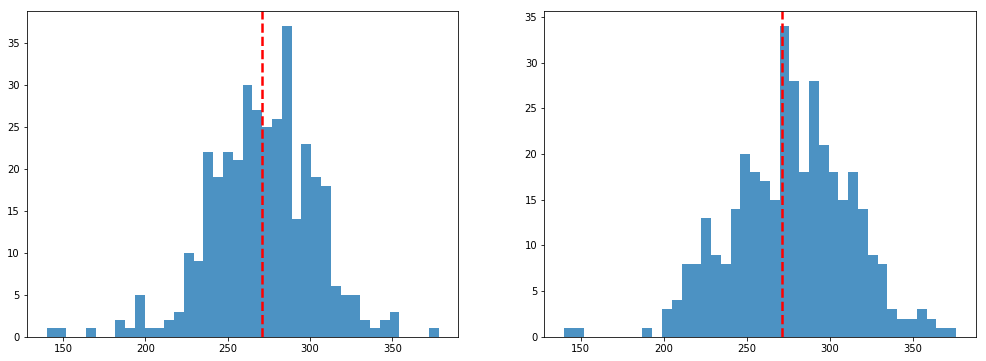

In [47]:
plt.figure(figsize=(17, 6))

plt.subplot(121)
plt.hist(crimes_2016.crime_count, 40, alpha=0.8)
plt.axvline(np.mean(crimes_per_date.crime_count), color='r', linestyle='dashed', linewidth=2.5)

plt.subplot(122)
plt.hist(crimes_2017.crime_count, 40, alpha=0.8)
plt.axvline(np.mean(crimes_per_date.crime_count), color='r', linestyle='dashed', linewidth=2.5)

plt.show()

<p>Для проверки гипотезы будем использовать критерий Стьюдента для связанных выборок, потому что мы анализируем число преступлений в одном городе, лишь в разное время:</p>

In [48]:
stats.ttest_rel(crimes_2016.crime_count, crimes_2017.crime_count)

Ttest_relResult(statistic=-2.801927878381955, pvalue=0.00535139082349511)

<p>Мы отвергаем нулевую гипотезу, а это значит, что выборка преступлений за 2016 год отличается от выборки за 2017 год. Действительно, посмотрим на средние значения и стандартные отклонения этих выборок:</p>

In [49]:
print("Mean 2016: ", np.mean(crimes_2016.crime_count.values))
print("Std 2016: ", np.std(crimes_2016.crime_count.values, ddof=1))
print("Mean 2017: ", np.mean(crimes_2017.crime_count.values))
print("Std 2017: ", np.std(crimes_2017.crime_count.values, ddof=1))

Mean 2016:  270.786301369863
Std 2016:  32.08733495601117
Mean 2017:  276.4
Std 2017:  35.70681899969421


<p>Как видим, выборочные средние и стандартные отклонения различаются. В 2017 году в среднем в день происходило на 6 преступлений больше, но и стандартное отклонение увеличилось.</p>

<p>У меня была идея проверить подобным образом попарно выборки из каждого месяца по отдельности и посомотреть, как меняются средние в течение года, но я не буду этого делать, так как суть та же - применение критерия Стьюдента для связанных выборок.</p>

<p>Проверим еще одну гипотезу. Как мы узнали ранее, преступления типа Larceny довольно таки популярны в городе, а особенно в его центральной части. Предлагаю сравнить распределение преступлений этого типа за август 2016 года с распределением за август 2017 года.</p>

<p>Для начала подготовим данные:</p>

In [50]:
larceny = crimes_in_boston[crimes_in_boston.OFFENSE_CODE_GROUP == 'Larceny'].DATE\
                                .value_counts().sort_index().to_frame()
larceny.index = pd.to_datetime(larceny.index)
larceny = larceny.rename({'DATE': 'crime_count'}, axis=1)

In [51]:
larceny_2016 = larceny[larceny.index.year == 2016]
larceny_2017 = larceny[larceny.index.year == 2017]

<p>На этот раз будем использовать непараметрический ранговый критерий, а конкретнее - критерий Уилкоксона. Как и в прошлый раз, выборки у нас являются связанными. Ограничением на применение данного критерия является размер выборки, но в августе 31 день, поэтому мы проходим:</p>

In [52]:
stats.wilcoxon(larceny_2016[larceny_2016.index.month == 8].crime_count, 
               larceny_2017[larceny_2017.index.month == 8].crime_count)

WilcoxonResult(statistic=134.0, pvalue=0.04253626105956959)

<p>Напомним, что p - вероятность ошибочно отвергнуть верную нулевую гипотезу. Так как нулевой гипотезой является предположение о том, что эти две выборки взяты из одного распределения, то можем заявить, что по критерию Уилкоксона распределения преступлений типа Larceny за август 2016 и 2017 года взяты из разных совокупностей, а значит положение в городе относительно подобных проишествий изменилось за год.</p>

<p><b>Промежуточные результаты:</b><p>
<ul>
    <li>Была отвергнута гипотеза о том, что распределния преступлений за 2016 и 2017 года взяты из одной совокупности. Применялся параметрический критерий Стьюдента для связанных выборок.</li>
    <li>Была отвергнута гипотеза о том, что распределния престулпений типа Larceny за август 2016 и 2017 год взяты из одной совокупности. Применялся непараметрический ранговый критерий Уилкоксона.</li>
</ul>

<br>

<h3>6. Построение предсказания временного ряда</h3>

<p>Для построения предсказания временного ряда будем использовать два метода: метод Холта-Уинтерса и ARIMA. В начале выделим из известного ряда некоторый тестовый интервал, на котором будем измерять ошибку предсказания, затем выберем метод с наименьшей ошибкой и построим предсказание для неизвестного интервала времени.</p>

In [53]:
test_crimes_size = 28

train_crimes = crimes_per_date.iloc[:-test_crimes_size]
test_crimes = crimes_per_date.iloc[-test_crimes_size:]

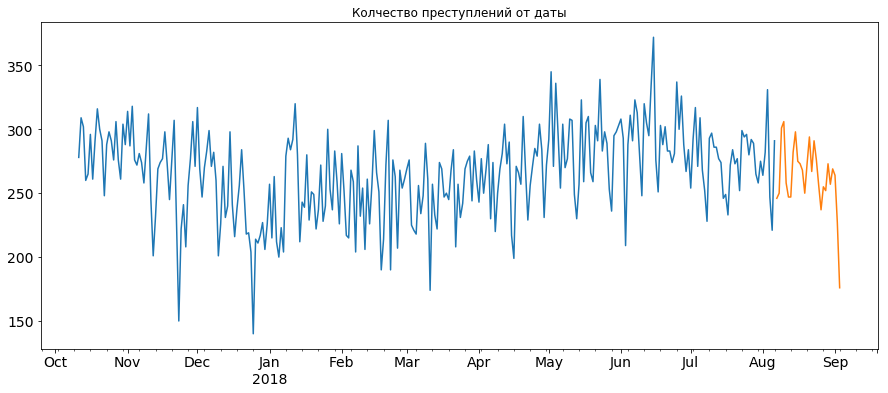

In [54]:
# строю не весь график, чтобы было нагляднее (все равно весь уже видели)
crimes_to_show = 300

train_crimes[-crimes_to_show:].crime_count.plot(figsize=(15, 6), title='Колчество преступлений от даты', fontsize=14)
test_crimes.crime_count.plot(figsize=(15, 6), title='Колчество преступлений от даты', fontsize=14)

<p>Сначала используем метод Холта-Уинтерса:</p>

In [55]:
hw_fit = ExponentialSmoothing(np.asarray(train_crimes.crime_count), seasonal_periods=28, trend='add', seasonal='add').fit()

In [56]:
hw_prediction = pd.DataFrame(hw_fit.forecast(len(test_crimes)), index=test_crimes.index, columns=['crime_count'])

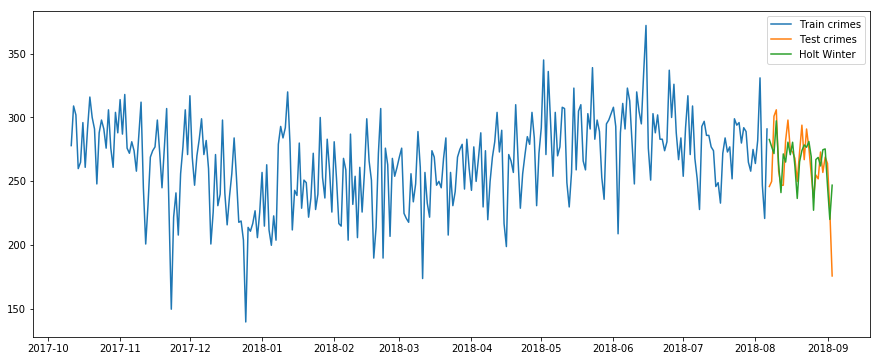

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(train_crimes[-crimes_to_show:].crime_count, label='Train crimes')
plt.plot(test_crimes.crime_count, label='Test crimes')
plt.plot(hw_prediction, label='Holt Winter')
plt.legend()
plt.show()

In [58]:
hw_error = np.sqrt(mean_squared_error(test_crimes.crime_count, hw_prediction.crime_count))
print(hw_error)

20.646042245213696


<p>С помощью метода Холта-Уинтерса удалось достигнуть неплохой точности.</p>

<p>Теперь будем использовать модель ARIMA. Для корректного использование модели ARIMA исходный ряд должен быть стационарен. Проверим это с помощью критерия Дики-Фуллера.</p>

In [59]:
test = sm.tsa.adfuller(train_crimes.crime_count)
print('adf: ', test[0] )
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.460205437615527
p-value:  0.009069889519991336
Critical values:  {'1%': -3.4361708439503587, '5%': -2.86411024137968, '10%': -2.5681384677365924}
единичных корней нет, ряд стационарен


<p>Будем строить модель SARIMA, учитывающую сезонность ряда.</p>

<p>Чтобы построить модель нам нужно знать ее порядок, состоящий из 6-х параметров:</p>
<ul>
    <li>p,P — порядок компоненты AR</li>
    <li>d,D — порядок интегрированного ряда</li>
    <li>q,Q — порядок компонетны MA</li>
</ul>

<p>Рассмотрим автокорреляционную и частную автокорреляционную функции:</p>
<ul>
<li>Q,P - номер последнего сезонного лага при котором автокорреляция значима (персекается граница доверительного интервала).</li>
<li>q,p - номер последнего несезонного лага при котором автокорреляция значима.</li>
</ul>

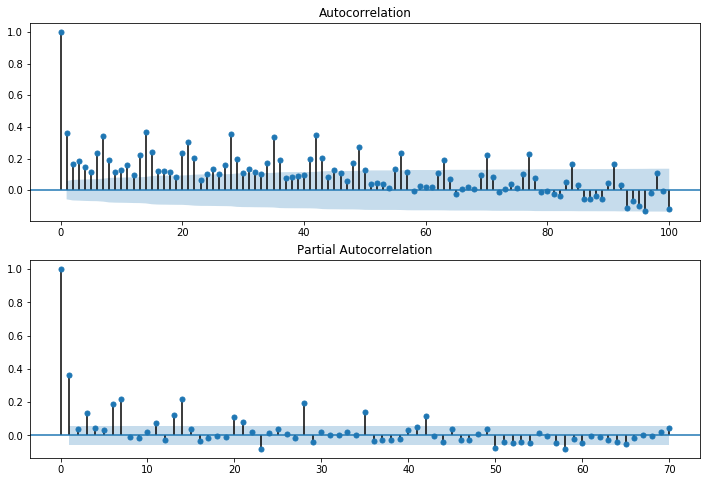

In [60]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_crimes.crime_count, lags=100, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_crimes.crime_count, lags=70, ax=ax2)

<p>Получаем следующие параметры:</p>

In [61]:
Q = 13
q = 48

P = 8
p = 23

D = 0
d = 0

s = 7 

In [62]:
best_model_sarima = sm.tsa.statespace.SARIMAX(train_crimes.crime_count.squeeze(), order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s), enforce_stationarity=False).fit()

C:\Users\Overdrive\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Overdrive\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [63]:
sarima_prediction = pd.DataFrame(best_model_sarima.predict(start=train_crimes.shape[0], 
                                                    end=train_crimes.shape[0]+test_crimes_size-1), 
                                 index=test_crimes.index, columns=['crime_count'])

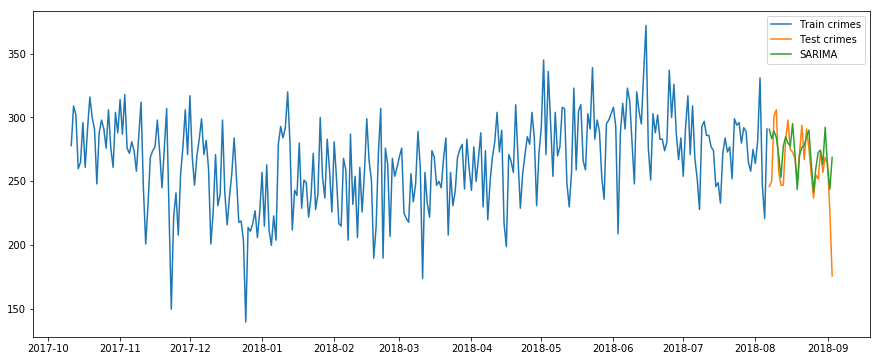

In [64]:
plt.figure(figsize=(15, 6))
plt.plot(train_crimes[-crimes_to_show:].crime_count, label='Train crimes')
plt.plot(test_crimes.crime_count, label='Test crimes')
plt.plot(sarima_prediction, label='SARIMA')
plt.legend()
plt.show()

In [65]:
sarima_error = np.sqrt(mean_squared_error(test_crimes.crime_count, sarima_prediction.crime_count))
print(sarima_error)

24.220772877503048


<p>Как видим, ошибка немного больше, чем в методе Холта-Уинтерса. Можно поперебирать параметры и попробовать добиться более высокой точности, но это очень затратно по вычислительным ресурам. Поэтому оставим всё, как есть, а для предсказания ряда на неизвестный интервал будем использовать метод Холта-Уинтерса.</p>

In [66]:
hw_fit_ = ExponentialSmoothing(np.asarray(crimes_per_date), seasonal_periods=28, trend='add', seasonal='add').fit()

In [67]:
prediction_length = 28
hw_prediction = pd.DataFrame(hw_fit.forecast(prediction_length), 
                             index=pd.DatetimeIndex(start=pd.to_datetime('2018-09-04'), 
                                                    end=pd.to_datetime('2018-10-01'),
                                                    freq='d'),
                             columns=['crime_count'])

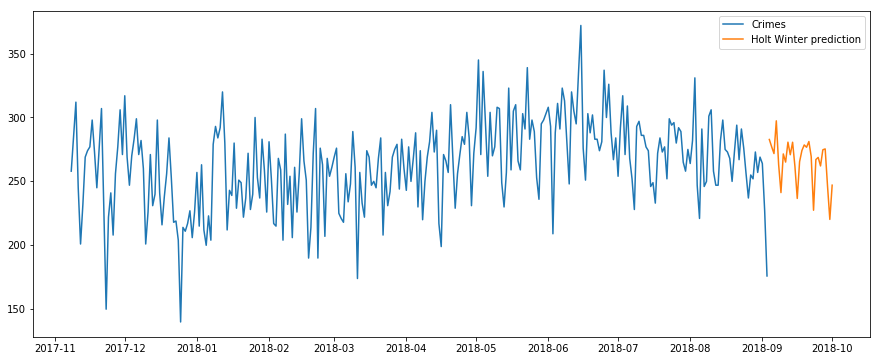

In [68]:
plt.figure(figsize=(15, 6))
plt.plot(crimes_per_date[-crimes_to_show:], label='Crimes')
plt.plot(hw_prediction, label='Holt Winter prediction')
plt.legend()
plt.show()

<br>

<h3>7. Выводы</h3>

<p>Всю работу можно разбить на 4 части: подготовка, визуальный анализ, проверка статистических гипотез и предсказание временного ряда. Рассмотрим каждый по порядку:</p>

<p>В качестве датасета для анализа был выбран датасет с информацией о преступлениях в Бостоне за последние несколько лет. В ходе начальной предобработки я выкинул некоторые столбцы, которые, однако, могли бы найти применение в ходе анализа. Также я не использовал некоторые из тех столбцов, которые оставил. Конечно,  я провел лишь поверхностный анализ, но, как я считаю, достаточный для данной работы.</p>

<p>В разделе, связанном с визуальным анализом, было найдено несколько интересных особенностей. Например, на построенной карте плотности преступлений было отчетливо видно, как они кластеризуются по координате. К сожалению, я не проводил плотностной кластерный анализ, хоть он бы и дал много интересных результатов, но, несмотря на это, у меня получилось поверхностно описать кластер в центре города. Как было показано, этот кластер характеризуется повышенным уровнем Larceny. О возможных причинах я писал выше, вкратце: центр города привлекает преступников за счет дорогого имущества.</p>

<p>Что касается зависимости числа преступлений от даты и времени, здесь тоже есть интересные находки. Так, например, зависимость преступлений от даты обладает ярко выраженной сезонностью, автокоррелирована с лагом в 7 дней. Это интересная находка, от которой можно отталкиваться при анализе причин преступлений в попытках их предсказания и профилактики. Что касается зависимости преступлений от времени, информация в датасете не позволяет провести анализ этого ряда.</p>

<p>Перед проверкой статистических гипотез было показано, что распределение числа преступлений близко к нормальному. Первой гипотезой стало предположение о том, что распределение преступлений за 2016 и 2017 года взяты из одной совокупности. Критерий Стьюдента для связанных выборок показал, что данная гипотеза должна быть отвергнута. На мой взгляд, этот результат не дает каких либо серьезных выводов. Было бы интереснее наблюдать за изменением распределений в промежутке, например, в 10 лет, и тем самым посмотреть на общую тенденцию к изменению за большой промежуток времени.</p>

<p>Второй гипотезой стало предположение о том, что выборки преступлений типа Larceny за август 2016 и 2017 года взяты из одной совокупности. Критерий Уилкоксона говорит о том, что данная гипотеза должна быть отвергнута. Хотелось бы, конечно, рассмотреть статистику за более длинные промежутки времени, чем один год, по тем же причинам.</p>

<p>Единственным разумным объяснением этим результатам может послужить лишь то, что мир сам по себе не является статичным, и очевидно то, что распределения преступлений будут меняться. Но, опять же, интерес представляет не сам факт разных распределений, а та информация, каким образом они меняются со временем. Для подобного анализа нужно больше данных.</p>

<p>Что касается временных рядов, были использованы два метода: метод Холта-Уинтерса и SARIMA. Первый показал лучшую точность, однако я особо не варьировал параметры SARIMA в связи с ограничением в производительности. Итоговое предсказание построил с помощью метод Холта-Уинтерса.</p>

<p>Подводя итоги, данный датасет был изучен лишь поверхностно. Однако, несмотря на это, было получены некоторые интересные результаты, о которых я написал выше.</p>

<br><hr><br>

<p style='text-align: center'><b>20 ноября 2018г.</b></p>